In [4]:
pip install requests

In [7]:
import pandas as pd
import requests
import numpy as np


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    display(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Extração de dados para melhor compreensão



In [9]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']), customer_df, phone_df, internet_df, account_df], axis=1)

display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Renomear colunas para melhor compreensão



In [10]:
new_column_names = [
    'id_cliente', 'churn', 'genero', 'aposentado', 'casado', 'dependentes',
    'meses_como_cliente', 'servico_telefone', 'multiplas_linhas', 'servico_internet',
    'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
    'tv_a_cabo', 'streaming_filmes', 'tipo_contrato', 'fatura_digital',
    'forma_pagamento', 'valor_mensal', 'total_gasto'
]
df.columns = new_column_names
print(df.columns.to_list())

['id_cliente', 'churn', 'genero', 'aposentado', 'casado', 'dependentes', 'meses_como_cliente', 'servico_telefone', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_a_cabo', 'streaming_filmes', 'tipo_contrato', 'fatura_digital', 'forma_pagamento', 'valor_mensal', 'total_gasto']


## Display dataframe


In [11]:
display(df.head())

,id_cliente,churn,genero,aposentado,casado,dependentes,meses_como_cliente,servico_telefone,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,tv_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7267 non-null   object 
 1   churn                 7267 non-null   object 
 2   genero                7267 non-null   object 
 3   aposentado            7267 non-null   int64  
 4   casado                7267 non-null   object 
 5   dependentes           7267 non-null   object 
 6   meses_como_cliente    7267 non-null   int64  
 7   servico_telefone      7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  tv_a_cabo             7267 non-null   object 
 15  streaming_filmes     

In [13]:
df['total_gasto'] = pd.to_numeric(df['total_gasto'], errors='coerce')
df['total_gasto'] = df['total_gasto'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7267 non-null   object 
 1   churn                 7267 non-null   object 
 2   genero                7267 non-null   object 
 3   aposentado            7267 non-null   int64  
 4   casado                7267 non-null   object 
 5   dependentes           7267 non-null   object 
 6   meses_como_cliente    7267 non-null   int64  
 7   servico_telefone      7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  tv_a_cabo             7267 non-null   object 
 15  streaming_filmes     

In [42]:
print("Valores nulos antes:")
print(df.isnull().sum())

df.dropna(inplace=True)

print("\nValores nulos depois:")
print(df.isnull().sum())

Valores nulos antes:
id_cliente              0
churn                   0
genero                  0
aposentado              0
casado                  0
dependentes             0
meses_como_cliente      0
servico_telefone        0
multiplas_linhas        0
servico_internet        0
seguranca_online        0
backup_online           0
protecao_dispositivo    0
suporte_tecnico         0
tv_a_cabo               0
streaming_filmes        0
tipo_contrato           0
fatura_digital          0
forma_pagamento         0
valor_mensal            0
total_gasto             0
Contas_Diarias          0
numero_servicos         0
dtype: int64

Valores nulos depois:
id_cliente              0
churn                   0
genero                  0
aposentado              0
casado                  0
dependentes             0
meses_como_cliente      0
servico_telefone        0
multiplas_linhas        0
servico_internet        0
seguranca_online        0
backup_online           0
protecao_dispositivo    0
suporte

In [43]:
print(f"Numero de colunas antes de tirar duplicadas: {len(df)}")

df.drop_duplicates(subset=['id_cliente'], inplace=True)

print(f"Numero de colunas depois de tirar duplicadas: {len(df)}")

Numero de colunas antes de tirar duplicadas: 7267
Numero de colunas depois de tirar duplicadas: 7267


#Análise exploratoria

## Distribuição de colunas numéricas


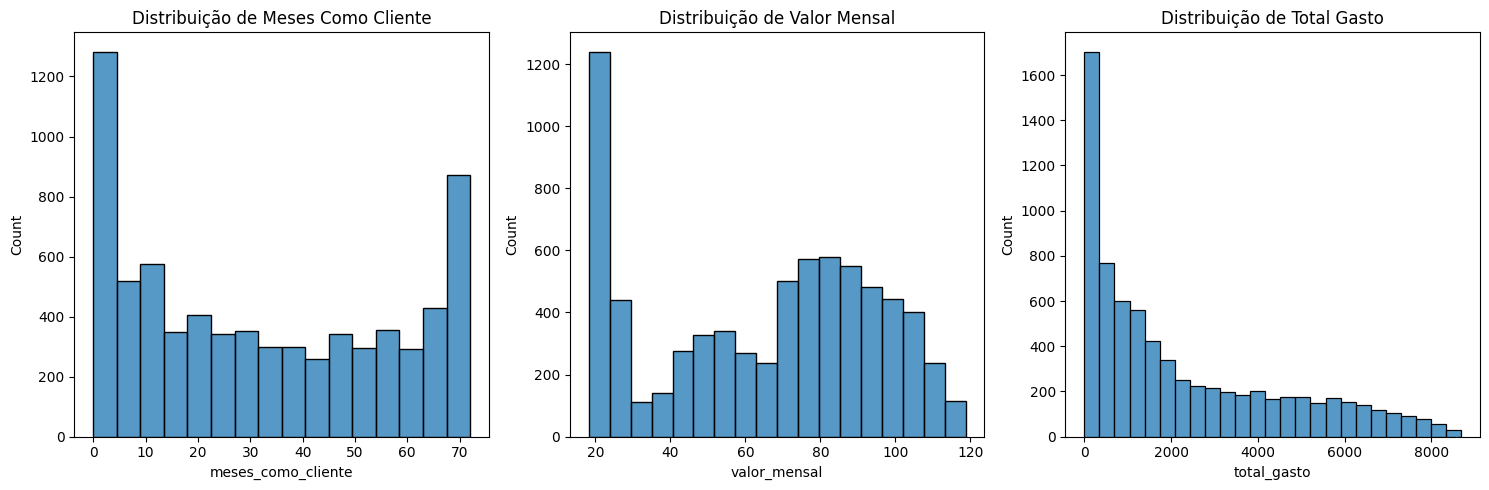

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='meses_como_cliente', ax=axes[0])
axes[0].set_title('Distribuição de Meses Como Cliente')

sns.histplot(data=df, x='valor_mensal', ax=axes[1])
axes[1].set_title('Distribuição de Valor Mensal')

sns.histplot(data=df, x='total_gasto', ax=axes[2])
axes[2].set_title('Distribuição de Total Gasto')

plt.tight_layout()
plt.show()

## Distribuição de colunas de categoria



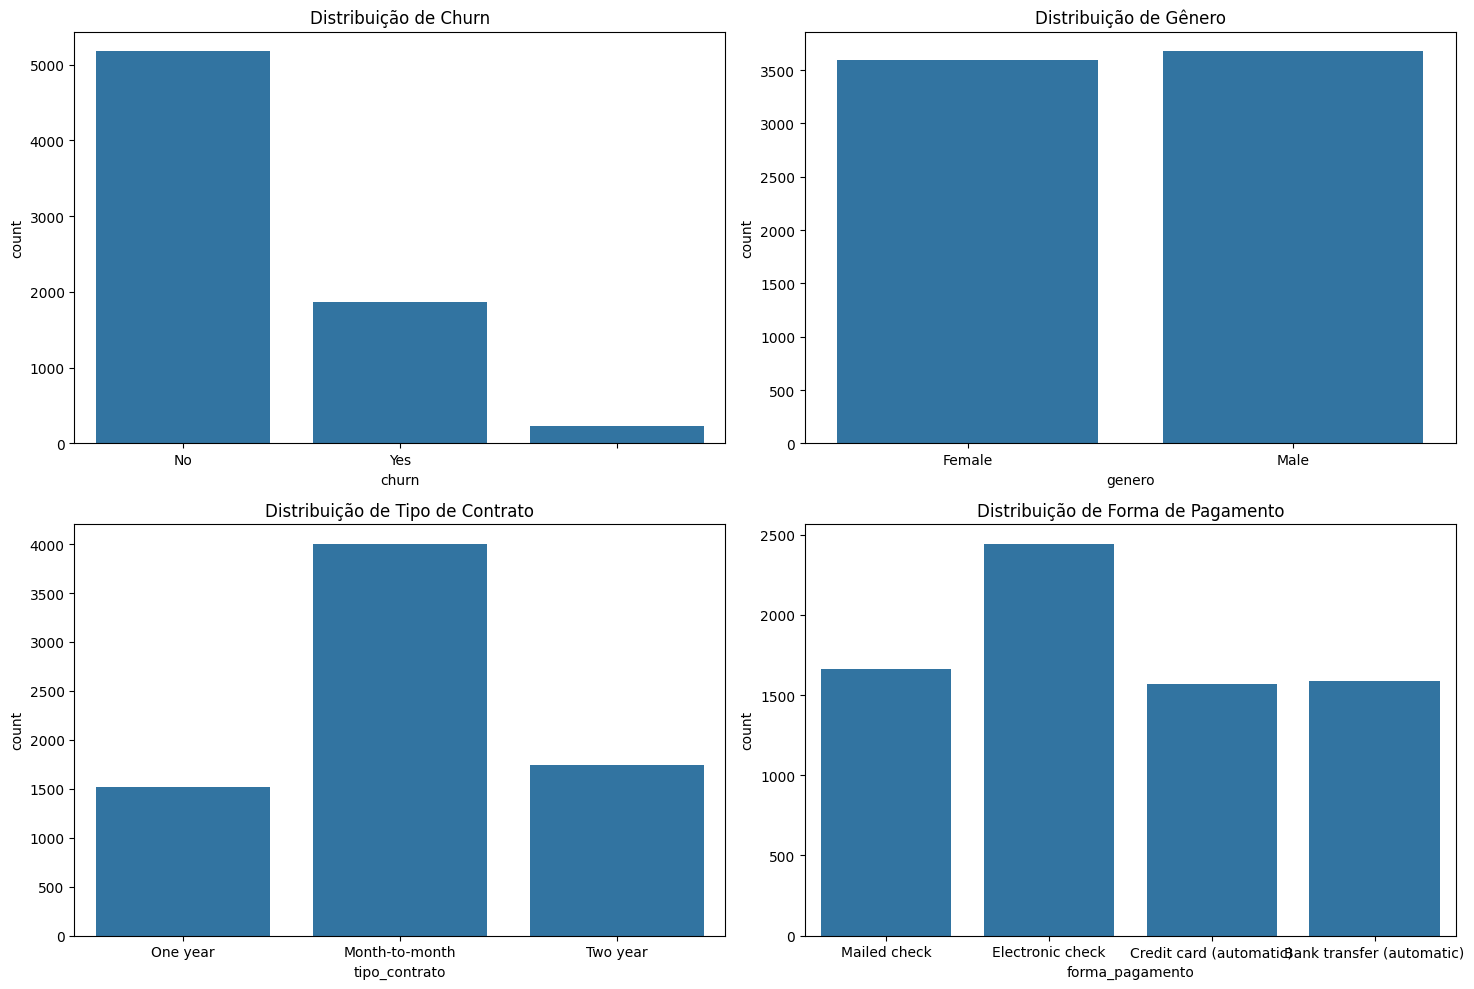

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=df, x='churn', ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Churn')

sns.countplot(data=df, x='genero', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Gênero')

sns.countplot(data=df, x='tipo_contrato', ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Tipo de Contrato')

sns.countplot(data=df, x='forma_pagamento', ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Forma de Pagamento')

plt.tight_layout()
plt.show()

## Exploração de variáveis e churn




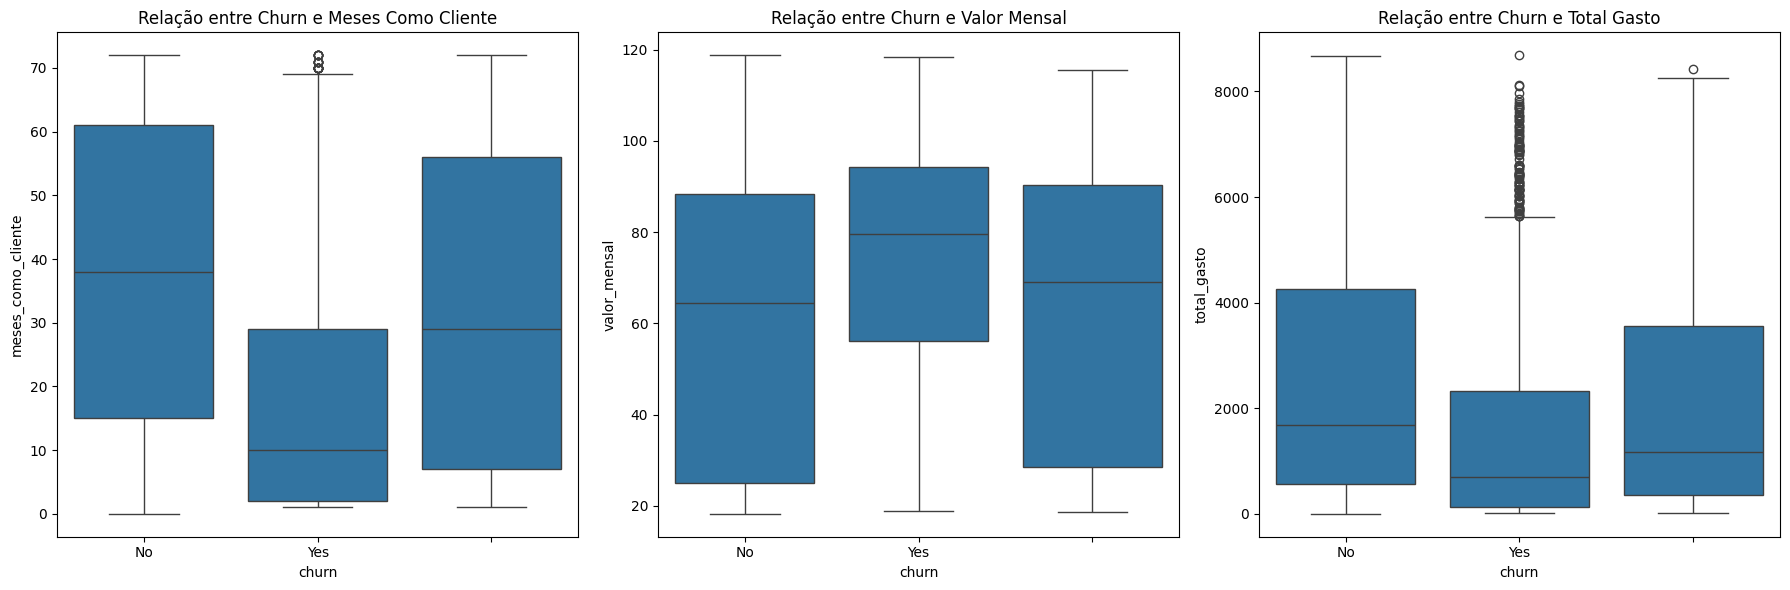

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x='churn', y='meses_como_cliente', ax=axes[0])
axes[0].set_title('Relação entre Churn e Meses Como Cliente')

sns.boxplot(data=df, x='churn', y='valor_mensal', ax=axes[1])
axes[1].set_title('Relação entre Churn e Valor Mensal')

sns.boxplot(data=df, x='churn', y='total_gasto', ax=axes[2])
axes[2].set_title('Relação entre Churn e Total Gasto')

plt.tight_layout()
plt.show()

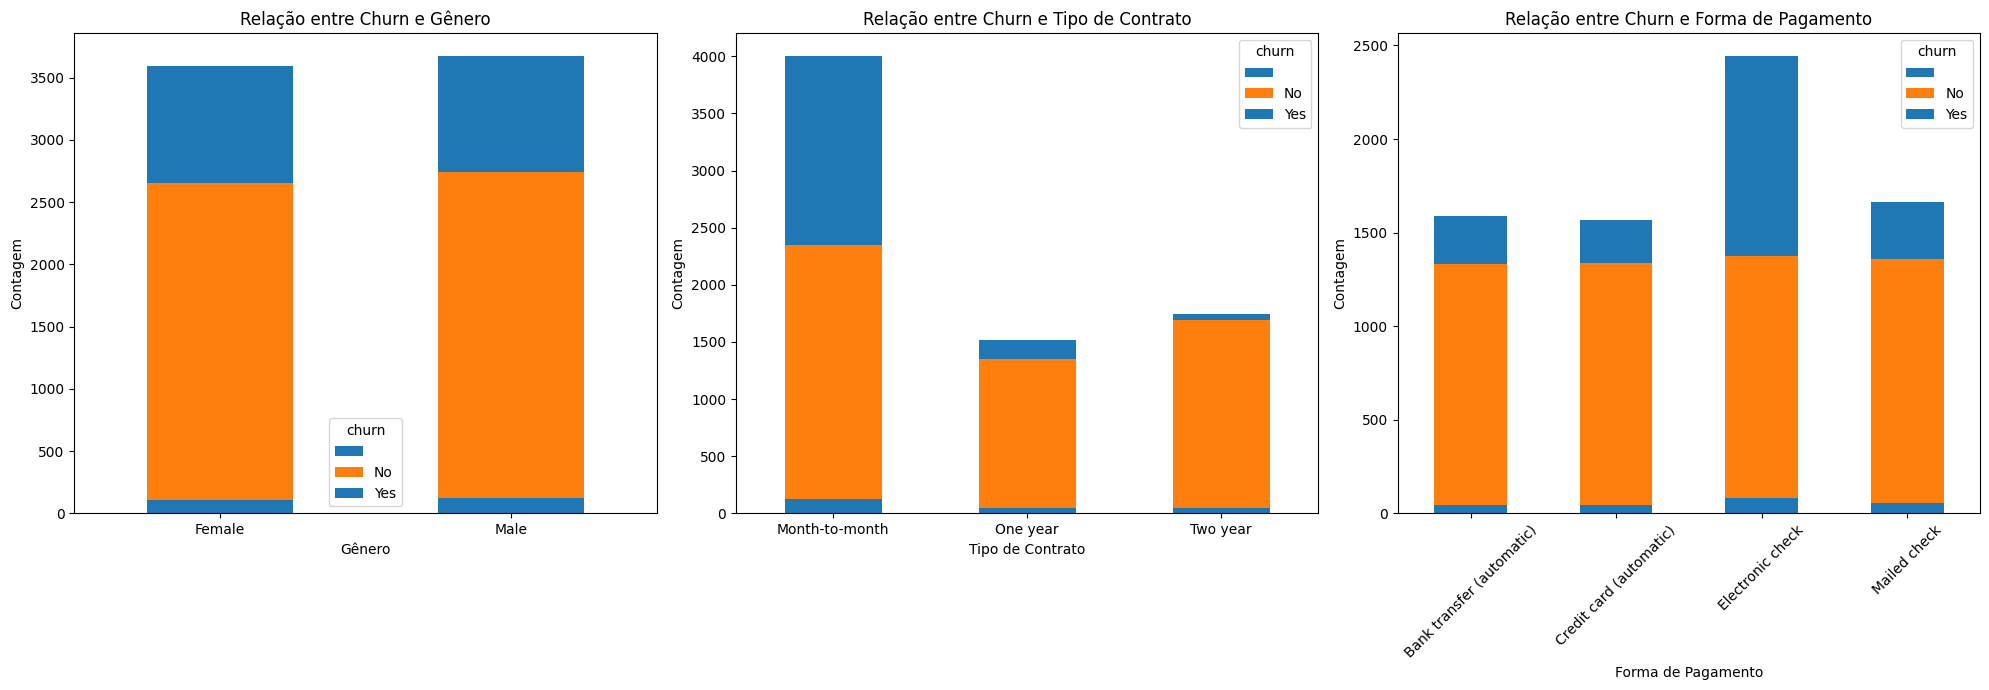

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

churn_gender = df.groupby(['genero', 'churn']).size().unstack()
churn_gender.plot(kind='bar', stacked=True, ax=axes[0], color=['#1f77b4', '#ff7f0e']) # Using default blue and orange
axes[0].set_title('Relação entre Churn e Gênero')
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=0)


churn_contract = df.groupby(['tipo_contrato', 'churn']).size().unstack()
churn_contract.plot(kind='bar', stacked=True, ax=axes[1], color=['#1f77b4', '#ff7f0e']) # Using default blue and orange
axes[1].set_title('Relação entre Churn e Tipo de Contrato')
axes[1].set_xlabel('Tipo de Contrato')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=0)


churn_payment = df.groupby(['forma_pagamento', 'churn']).size().unstack()
churn_payment.plot(kind='bar', stacked=True, ax=axes[2], color=['#1f77b4', '#ff7f0e']) # Using default blue and orange
axes[2].set_title('Relação entre Churn e Forma de Pagamento')
axes[2].set_xlabel('Forma de Pagamento')
axes[2].set_ylabel('Contagem')
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

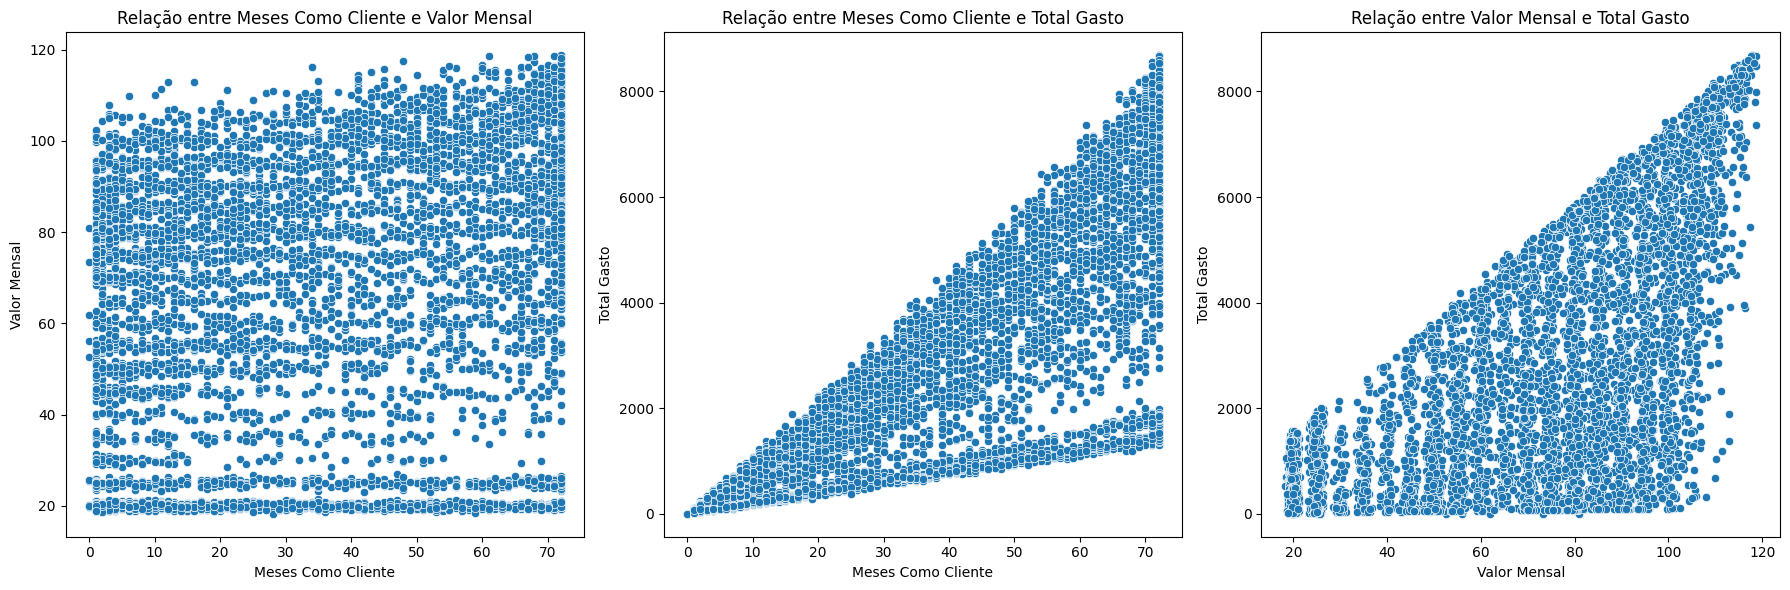

Correlation Matrix:


,meses_como_cliente,valor_mensal,total_gasto
meses_como_cliente,1.000000,0.247982,0.825407
valor_mensal,0.247982,1.000000,0.652211
total_gasto,0.825407,0.652211,1.000000


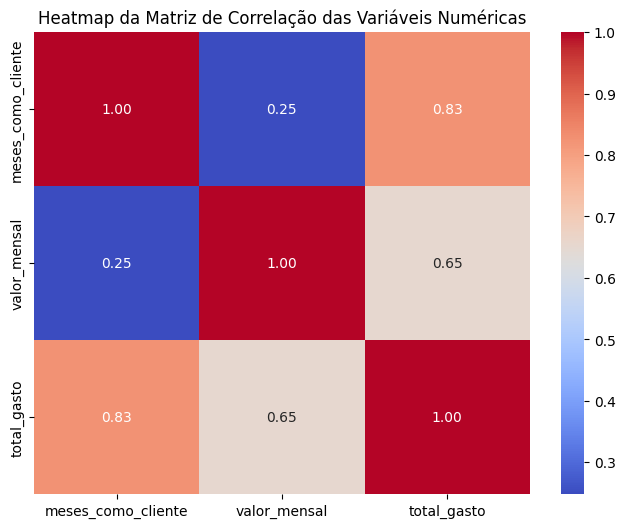

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df, x='meses_como_cliente', y='valor_mensal', ax=axes[0])
axes[0].set_title('Relação entre Meses Como Cliente e Valor Mensal')
axes[0].set_xlabel('Meses Como Cliente')
axes[0].set_ylabel('Valor Mensal')

sns.scatterplot(data=df, x='meses_como_cliente', y='total_gasto', ax=axes[1])
axes[1].set_title('Relação entre Meses Como Cliente e Total Gasto')
axes[1].set_xlabel('Meses Como Cliente')
axes[1].set_ylabel('Total Gasto')

sns.scatterplot(data=df, x='valor_mensal', y='total_gasto', ax=axes[2])
axes[2].set_title('Relação entre Valor Mensal e Total Gasto')
axes[2].set_xlabel('Valor Mensal')
axes[2].set_ylabel('Total Gasto')

plt.tight_layout()
plt.show()

# Calculate and display the correlation matrix
numerical_cols = ['meses_como_cliente', 'valor_mensal', 'total_gasto']
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Create and display the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Matriz de Correlação das Variáveis Numéricas')
plt.show()

## Criando a coluna 'Contas_Diarias'

In [27]:
df['Contas_Diarias'] = df['valor_mensal'] / 30
display(df.head())

,id_cliente,churn,genero,aposentado,casado,dependentes,meses_como_cliente,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,tv_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Relação entre Churn e Contas Diárias

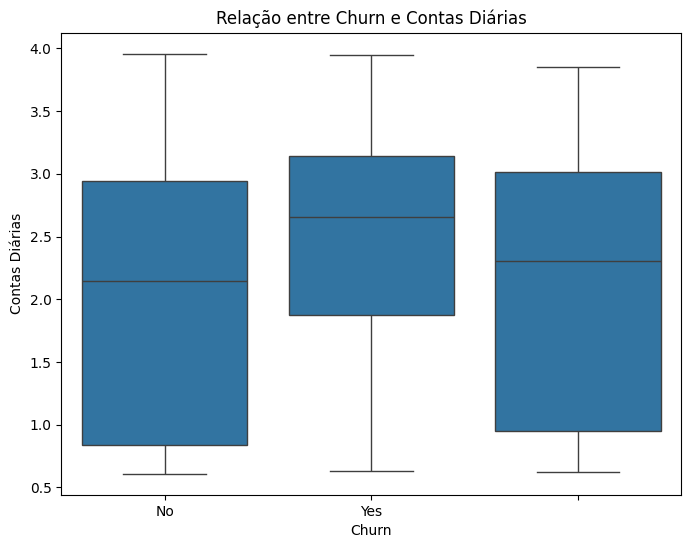

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='churn', y='Contas_Diarias')
plt.title('Relação entre Churn e Contas Diárias')
plt.xlabel('Churn')
plt.ylabel('Contas Diárias')
plt.show()

## Análise Descritiva dos Dados

In [29]:
display(df.describe())

,aposentado,meses_como_cliente,valor_mensal,total_gasto,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


###Criando a coluna 'numero_servicos' - ATIVIDADE EXTRA

In [30]:
service_cols = [
    'servico_telefone', 'multiplas_linhas', 'servico_internet',
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'tv_a_cabo', 'streaming_filmes'
]

extra_service_cols = [
    'multiplas_linhas', 'seguranca_online', 'backup_online',
    'protecao_dispositivo', 'suporte_tecnico', 'tv_a_cabo', 'streaming_filmes'
]

df['numero_servicos_extra'] = df[extra_service_cols].apply(lambda row: row.astype(str).str.contains('Yes').sum(), axis=1)

# Add 1 if they have phone service (excluding 'No phone service')
df['tem_servico_telefone'] = df['servico_telefone'].apply(lambda x: 1 if x == 'Yes' else 0)

# Add 1 if they have internet service (excluding 'No internet service')
df['tem_servico_internet'] = df['servico_internet'].apply(lambda x: 1 if x != 'No internet service' else 0)

# Total number of services
df['numero_servicos'] = df['numero_servicos_extra'] + df['tem_servico_telefone'] + df['tem_servico_internet']

# Drop the intermediate columns
df.drop(columns=['numero_servicos_extra', 'tem_servico_telefone', 'tem_servico_internet'], inplace=True)

display(df[['numero_servicos', 'churn']].head())

,numero_servicos,churn
0,5,No
1,4,No
2,3,Yes
3,6,Yes
4,4,Yes


## Relação entre Churn e Número de Serviços

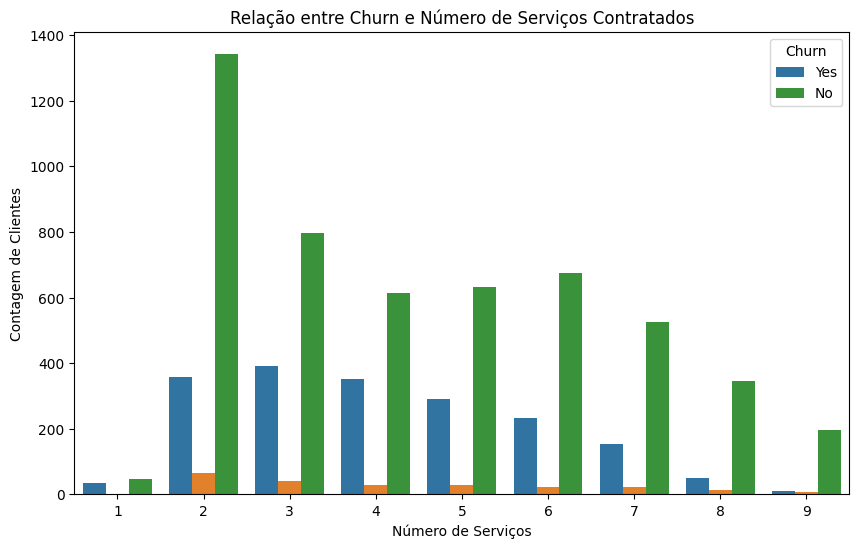

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='numero_servicos', hue='churn')
plt.title('Relação entre Churn e Número de Serviços Contratados')
plt.xlabel('Número de Serviços')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Churn')
plt.show()